# 해결하고 싶은 문제
- 지연 배송에 영향을 주는 요인을 분석후 개선 점 제시

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('/Users/simcheol-u/Downloads/Study2_Train.csv')

In [3]:
df.set_index('ID', inplace=True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 1 to 10999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


In [5]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


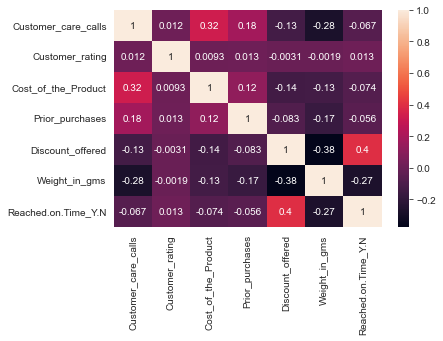

In [6]:
sns.heatmap(df.corr(), annot = True);

## - 평균적으로 60%의 제품은 지연 배송 되었다.

In [7]:
target = 'Reached.on.Time_Y.N'

print(f'평균 배송 지연률 : {df[target].mean()}')

평균 배송 지연률 : 0.5966906082371125


## 지연 배송 유무와 연관 된 feature 찾기

In [8]:
# 정시배송, 지연배송 데이터 분리
df_Y = df[df['Reached.on.Time_Y.N'] == 1]
df_N = df[df['Reached.on.Time_Y.N'] == 0]
target_col = []

# two sample t-test
for col in df.select_dtypes('int').columns:
    tvalue, pvalue = stats.ttest_ind(df_Y[col], df_N[col])
    if pvalue < 0.01:
        target_col += [col]
        
# 범주형 컬럼 two sample chi2-test
for col in df.select_dtypes('object').columns:
    obs1 = pd.crosstab(df[col], df['Reached.on.Time_Y.N'])
    chi2, pvalue, dof, expected = stats.chi2_contingency(obs1, correction = False)
    if pvalue < 0.01:
        target_col += [col]

target_col        

['Customer_care_calls',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N',
 'Product_importance']

## 연관 된 컬럼 시각화
횟수와같은 수치형 컬럼을 포함하여 수치의 변화에 따른 평균 지연배송 확률의 추이를 보기 위해서 lineplot을 사용

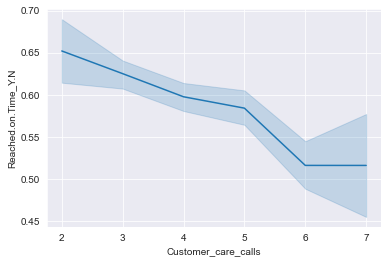

In [9]:
sns.lineplot(data=df, x='Customer_care_calls', y='Reached.on.Time_Y.N');

In [10]:
df[df['Customer_care_calls'] == 2].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,638.0,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,2.0,3.017241,189.888715,3.432602,16.774295,3682.147335,0.652038
std,0.0,1.434499,49.189460,1.436572,18.469012,1675.380727,0.476698
min,2.0,1.000000,96.000000,2.000000,1.000000,1023.000000,0.000000
25%,2.0,2.000000,152.000000,3.000000,4.000000,1809.250000,0.000000
50%,2.0,3.000000,182.000000,3.000000,8.000000,4164.000000,1.000000
75%,2.0,4.000000,231.750000,4.000000,24.750000,5069.250000,1.000000
max,2.0,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [25]:
df[df['Customer_care_calls'] == 7].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,246.0,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,7.0,2.995935,277.337398,4.126016,6.463415,1479.577236,0.516260
std,0.0,1.463844,27.897699,0.378469,6.461557,284.441207,0.500754
min,7.0,1.000000,133.000000,3.000000,1.000000,1003.000000,0.000000
25%,7.0,2.000000,262.500000,4.000000,3.000000,1235.750000,0.000000
50%,7.0,3.000000,282.000000,4.000000,6.000000,1478.500000,1.000000
75%,7.0,4.000000,296.000000,4.000000,8.000000,1733.000000,1.000000
max,7.0,5.000000,310.000000,5.000000,61.000000,1989.000000,1.000000


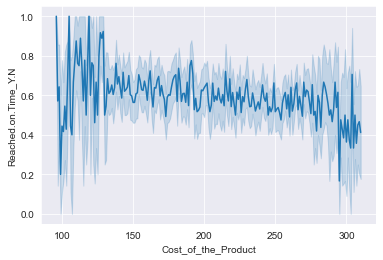

In [12]:
sns.lineplot(data=df, x='Cost_of_the_Product', y='Reached.on.Time_Y.N');

/Users/simcheol-u/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


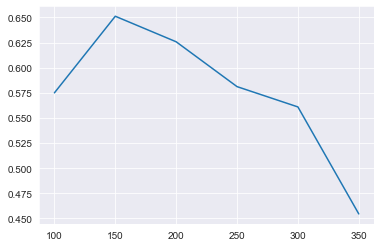

In [13]:
x = []
y = []

for ran in range(50, 350, 50):
    start = ran
    end = ran + 50
    condition = df[(df['Cost_of_the_Product'] > start) & (df['Cost_of_the_Product'] <= end)].index
    x += [end]
    y += [df.loc[condition, 'Reached.on.Time_Y.N'].mean()]

sns.lineplot(x, y);

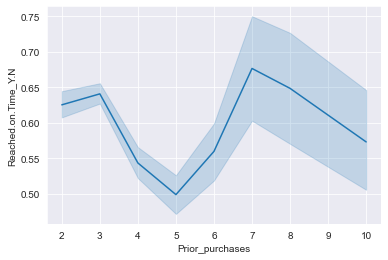

In [14]:
sns.lineplot(data=df, x='Prior_purchases', y='Reached.on.Time_Y.N');

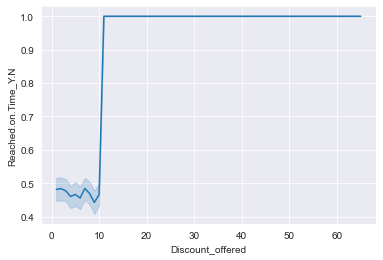

In [15]:
sns.lineplot(data=df, x='Discount_offered', y='Reached.on.Time_Y.N');

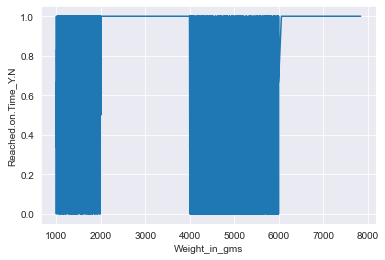

In [16]:
sns.lineplot(data=df, x='Weight_in_gms', y='Reached.on.Time_Y.N');

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Reached.on.Time_Y.N'>

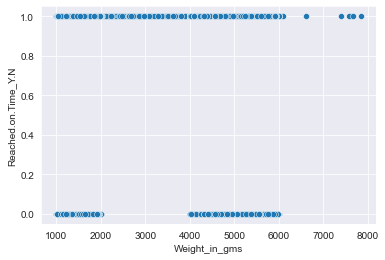

In [30]:
df_w = df.loc[:,['Weight_in_gms','Reached.on.Time_Y.N']]
sns.scatterplot(x='Weight_in_gms' , y='Reached.on.Time_Y.N', data = df_w);

In [17]:
for x in range(0, 8000, 2000):
    start = x
    end = x + 2000
    condition = df[(df['Weight_in_gms'] > start) & (df['Weight_in_gms'] < end)]
    print(f'{start}~{end} : ', round(condition['Reached.on.Time_Y.N'].mean(), 2))
    print('물량 비율 : ', round(len(condition) / len(df), 2))

0~2000 :  0.68
물량 비율 :  0.29
2000~4000 :  1.0
물량 비율 :  0.16
4000~6000 :  0.43
물량 비율 :  0.54
6000~8000 :  1.0
물량 비율 :  0.0


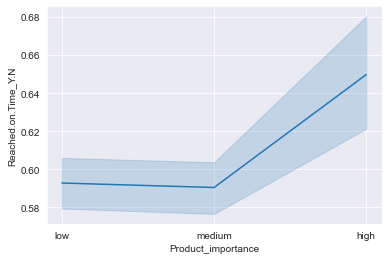

In [18]:
sns.lineplot(data=df, x='Product_importance', y='Reached.on.Time_Y.N');

 - customer care calls - 문의 전화가 많은 제품일 수록 정시 지연 배송 확률이 낮아진다.(전화 횟수가 많을 수록 평균 제품 가격이 높아진다.)

 - cost of the product - 가격이 높아 질 수록 지연 배송 확률이 감소 하였다.

 - discount offered - 할인 금액이 11이상이면 100% 지연 배송 되었다.

 - Prior purchases - 그래프의 굴곡의 변화는 급격하여 최대 약 20%까지 차이가 나지만 어떤 요인이 차이를 주는지 파악이 안됨
    
 - weight in gms - 0 ~ 2000/ 6000~8000 구간의 제품은 100% 지연배송 되었다.(할인이 11이상 되었다)

 - product inprotance - 상품 중요도가 mediumd에서 high로 갈 때 지연확률이 증가한다.

# 무게 구간 별 분석

In [59]:
df_sort = df.sort_values('Weight_in_gms')
df_sort.reset_index(drop=True, inplace=True)
df_sort.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,B,Ship,4,5,239,5,low,F,7,1001,1
1,B,Flight,5,3,260,5,medium,M,8,1001,0
2,F,Ship,4,4,151,2,low,F,38,1001,1
3,F,Road,5,2,254,5,medium,M,6,1002,0
4,F,Ship,5,4,222,6,low,F,9,1003,0


In [71]:
df_02 = df[df['Weight_in_gms'] <= 2000]
df_24 = df[(df['Weight_in_gms'] > 2000) & (df['Weight_in_gms'] < 4000)]
df_46 = df[(df['Weight_in_gms'] >= 4000) & (df['Weight_in_gms'] <= 6000)]
df_68 = df[(df['Weight_in_gms'] > 6000) & (df['Weight_in_gms'] < 8000)]

In [141]:
def pie_plt(column):
    fig=plt.figure(figsize=(10,8))

    ax_1=fig.add_subplot(221)
    ratio = df_02[column].value_counts(normalize=True)
    ax_1.pie(ratio, labels=df_02[column].unique(), autopct='%.1f%%')
    ax_1.set_title("02")


    ax_2=fig.add_subplot(222)
    ratio = df_24[column].value_counts(normalize=True)
    ax_2.pie(ratio, labels=df_24[column].unique(), autopct='%.1f%%')
    ax_2.set_title("24")

    ax_3=fig.add_subplot(223)
    ratio = df_46[column].value_counts(normalize=True)
    ax_3.pie(ratio, labels=df_46[column].unique(), autopct='%.1f%%')
    ax_3.set_title("46")


    ax_4=fig.add_subplot(224)
    ratio = df_68[column].value_counts(normalize=True)
    ax_4.pie(ratio, labels=df_68[column].unique(), autopct='%.1f%%')
    ax_4.set_title("68")

    fig.suptitle(column)
    plt.show()

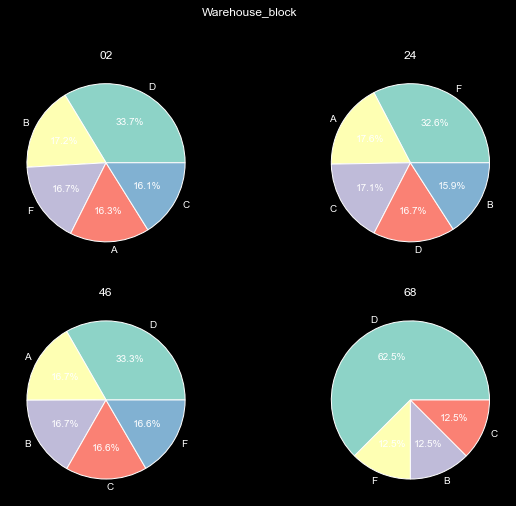

In [142]:
pie_plt('Warehouse_block')

In [134]:
# 표본 수가 적어서 판단하기 어려움

df_68

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
199,D,Ship,2,3,142,3,medium,F,38,7640,1
200,F,Ship,2,2,154,3,medium,M,38,7846,1
206,F,Ship,2,3,145,3,medium,F,24,7588,1
214,B,Ship,2,5,160,3,medium,F,31,7401,1
245,C,Ship,2,1,142,3,medium,F,8,6064,1
246,F,Ship,2,4,154,3,medium,F,48,7684,1
252,F,Road,2,2,145,3,medium,F,5,6102,1
258,F,Road,2,2,129,3,medium,F,22,6614,1


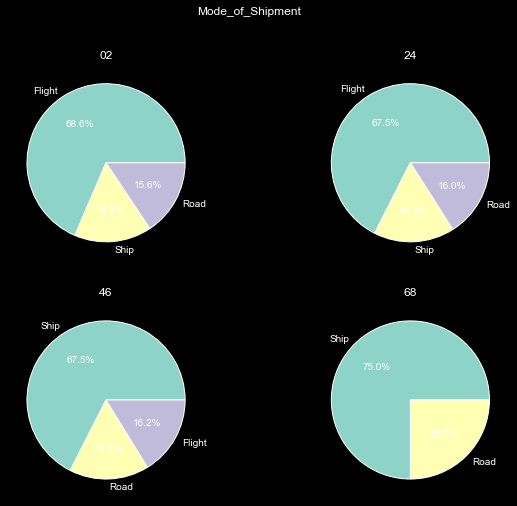

In [144]:
pie_plt('Mode_of_Shipment')

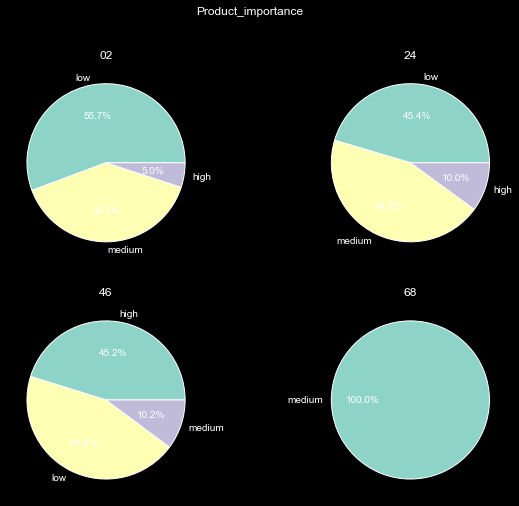

In [145]:
pie_plt('Product_importance')

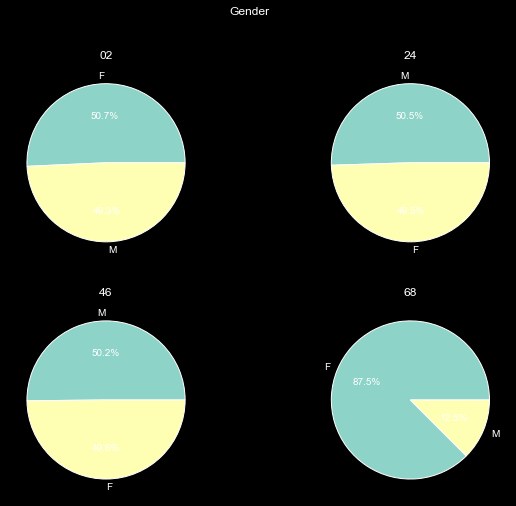

In [146]:
pie_plt('Gender')

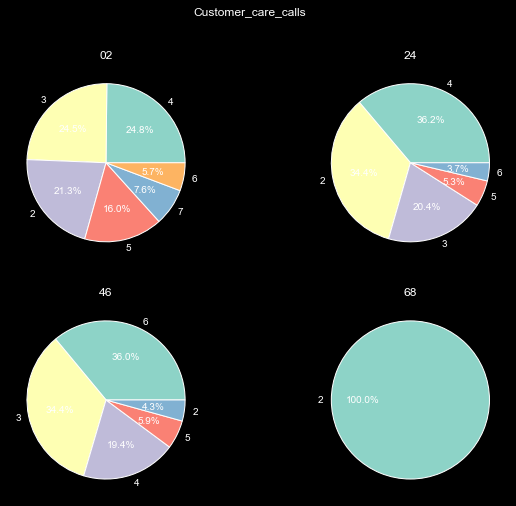

In [147]:
pie_plt('Customer_care_calls')

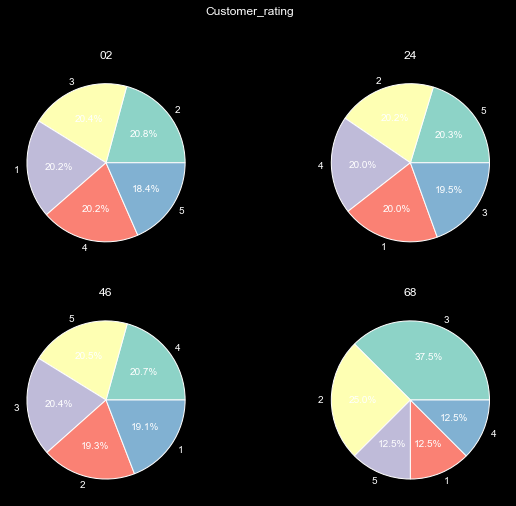

In [148]:
pie_plt('Customer_rating')

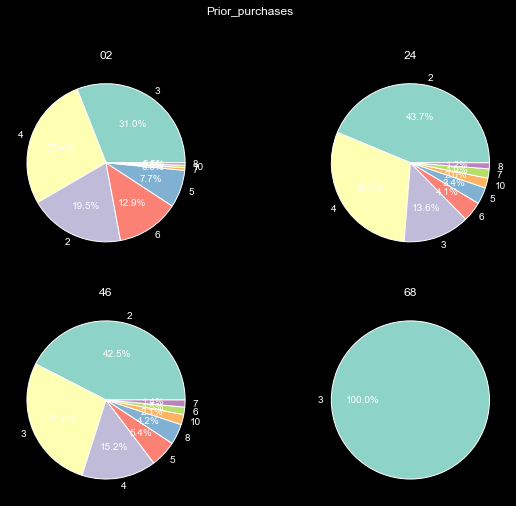

In [167]:
pie_plt('Prior_purchases')

In [79]:
df_yes = pd.concat([df_02,df_46])
df_no = pd.concat([df_24,df_68])

In [152]:
df_yes0 = df_yes[df_yes['Reached.on.Time_Y.N'] == 0]
df_yes1 = df_yes[df_yes['Reached.on.Time_Y.N'] == 1]

In [175]:
def pie_plt2(column):
    fig=plt.figure(figsize=(10,8))

    ax_1=fig.add_subplot(221)
    ratio = df_yes0[column].value_counts(normalize=True)
    ax_1.pie(ratio, labels=df_yes0[column].unique(), autopct='%.1f%%')
    ax_1.set_title("0")


    ax_2=fig.add_subplot(222)
    ratio = df_yes1[column].value_counts(normalize=True)
    ax_2.pie(ratio, labels=df_yes1[column].unique(), autopct='%.1f%%')
    ax_2.set_title("1")
    
    fig.suptitle(column)
    plt.show()

In [176]:
df_yes0.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.0
mean,4.147656,2.967989,214.498647,3.670424,5.545987,4168.668395,0.0
std,1.162771,1.414808,47.757432,1.525444,2.877727,1573.954178,0.0
min,2.000000,1.000000,97.000000,2.000000,1.000000,1001.000000,0.0
25%,3.000000,2.000000,174.000000,3.000000,3.000000,4043.500000,0.0
50%,4.000000,3.000000,222.000000,3.000000,6.000000,4674.000000,0.0
75%,5.000000,4.000000,254.000000,4.000000,8.000000,5337.000000,0.0
max,7.000000,5.000000,310.000000,10.000000,10.000000,6000.000000,0.0


In [177]:
df_yes1.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.0
mean,4.062697,3.006920,199.921577,3.573495,13.260222,3368.118264,1.0
std,1.173342,1.410261,51.574103,1.497235,16.237851,1796.950424,0.0
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,1.0
25%,3.000000,2.000000,156.000000,3.000000,4.000000,1537.000000,1.0
50%,4.000000,3.000000,192.000000,3.000000,7.000000,4115.000000,1.0
75%,5.000000,4.000000,247.000000,4.000000,10.000000,5030.000000,1.0
max,7.000000,5.000000,310.000000,10.000000,65.000000,6000.000000,1.0


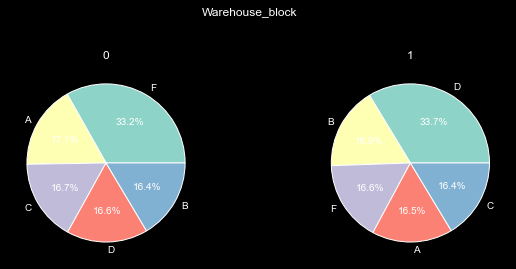

In [178]:
pie_plt2('Warehouse_block')

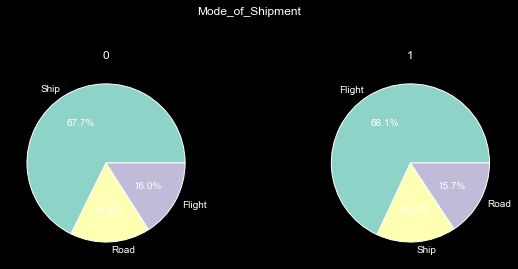

In [179]:
pie_plt2('Mode_of_Shipment')

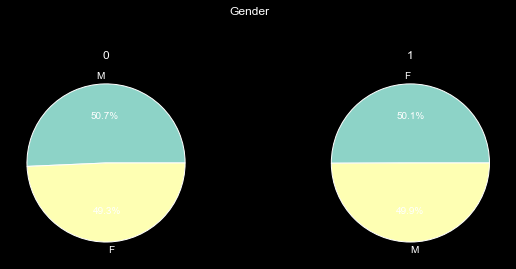

In [180]:
pie_plt2('Gender')

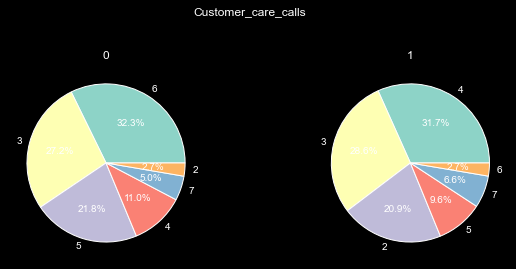

In [181]:
pie_plt2('Customer_care_calls')

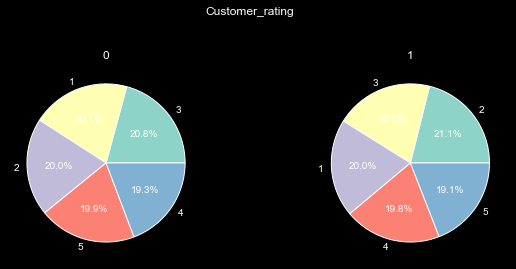

In [185]:
pie_plt2('Customer_rating')

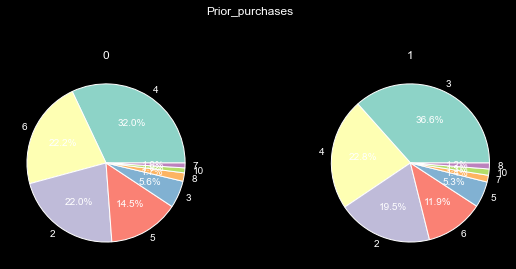

In [186]:
pie_plt2('Prior_purchases')

In [184]:
결론

무게 구간에 의해서 특정 구간은 100% 배송지연 되지만 그렇지 않은 구간에서 지연 배송 여부는 다른 요인에 영향이 없다.

제품을 2000g 단위로 분류하여 처리하며 2000 ~ 4000/ 4000~6000 구간의 제품의 처리하는 프로세스에 문제가 있다.

제품 물량이 많아서 배송이 지연 된다고 가정하면, 2000 ~ 4000/ 4000~6000 구간의 제품이 지연 배송률이 높아야 하는데 그렇지 않음

SyntaxError: invalid syntax (2246853963.py, line 3)